In [1]:
import pandas as pd
# Seaborn for easier visualization
import seaborn as sns
# Matplotlib for visualization
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline 

In [2]:
user_id_col = 'learner_id'
item_id_col = 'media_id'
rating_col = 'like_rating'
min_no_of_items = 10

In [3]:
events_df = pd.read_csv('preprocessed_data/latest_rating_new.csv')
print("{:30} : {:20} : {}".format("Data", "No of records", len(events_df)))
print("{:30} : {:20} : {}".format("Data", "No of users", len(events_df[user_id_col].unique())))
print("{:30} : {:20} : {}".format("Data", "No of items", len(events_df[item_id_col].unique())))

events_df = events_df.drop(['Unnamed: 0'], axis=1)

#filtering data to be imported
print('*'*80)
print("Filtering Data...")
user_items_df = events_df.groupby([user_id_col])\
                         .agg({item_id_col: (lambda x: len(x.unique()))})\
                         .rename(columns={item_id_col : 'no_of_items'})\
                         .reset_index()
dist = user_items_df['no_of_items'].describe()
print(dist)

user_min_items_df = user_items_df[user_items_df['no_of_items'] >= min_no_of_items]        
data = pd.merge(user_min_items_df, events_df, how='inner', on=user_id_col)
print("Min no of items : ", min_no_of_items)
print()
print("{:30} : {:20} : {}".format("Filtered Data", "No of records", len(data)))
print("{:30} : {:20} : {}".format("Filtered Data", "No of users", len(data[user_id_col].unique())))
print("{:30} : {:20} : {}".format("Filtered Data", "No of items", len(data[item_id_col].unique())))

/home/ravi/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (28,40) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Data                           : No of records        : 345697
Data                           : No of users          : 42967
Data                           : No of items          : 7397
********************************************************************************
Filtering Data...
count    42967.000000
mean         8.045640
std         15.962882
min          1.000000
25%          1.000000
50%          3.000000
75%          8.000000
max        564.000000
Name: no_of_items, dtype: float64
Min no of items :  10

Filtered Data                  : No of records        : 244659
Filtered Data                  : No of users          : 9418
Filtered Data                  : No of items          : 7109


In [4]:
data.head()

,learner_id,no_of_items,media_id,src.x,event_time,difficulty_rating,like_rating,media_uri,category_seq,content_seq,...,plannel,paid,provider_learner_id,birthday,sex_real,favorate1,favorate2,favorate3,level_by_word,src
0,-141004,12,11742,hist,2018-04-12 18:46:06,2,3,http://player.vimeo.com/external/208002207.sd....,9,27540,...,Spookiz S1,True,141004,2018-01-01,M,10,6,2,NaN,hist
1,-141004,12,11752,hist,2018-04-12 18:46:18,2,3,http://player.vimeo.com/external/208010979.sd....,9,27550,...,Spookiz S1,True,141004,2018-01-01,M,10,6,2,NaN,hist
2,-141004,12,11768,hist,2018-04-12 18:46:21,2,3,http://player.vimeo.com/external/208013783.sd....,9,27553,...,Spookiz S1,True,141004,2018-01-01,M,10,6,2,NaN,hist
3,-141004,12,11778,hist,2018-04-12 18:46:26,2,3,http://player.vimeo.com/external/208015430.sd....,9,27555,...,Spookiz S1,True,141004,2018-01-01,M,10,6,2,NaN,hist
4,-141004,12,11779,hist,2018-04-12 18:46:27,2,3,http://player.vimeo.com/external/208016039.sd....,9,27556,...,Spookiz S1,True,141004,2018-01-01,M,10,6,2,NaN,hist


In [6]:
data.iloc[0].T

learner_id                                                       -141004
no_of_items                                                           12
media_id                                                           11742
src.x                                                               hist
event_time                                           2018-04-12 18:46:06
difficulty_rating                                                      2
like_rating                                                            3
media_uri              http://player.vimeo.com/external/208002207.sd....
category_seq                                                           9
content_seq                                                        27540
title                                                Episode.10 Pop Quiz
duration                                                              83
category_name                                                       인기만화
level_type                                         

In [12]:
data[['like_rating', 'difficulty_rating']].head()

,like_rating,difficulty_rating
0,3,2
1,3,2
2,3,2
3,3,2
4,3,2


In [9]:
data['difficulty_rating'].value_counts()

2    111474
1     74293
3     58878
0        14
Name: difficulty_rating, dtype: int64

In [8]:
data['transcript'].isnan()

AttributeError: 'Series' object has no attribute 'isnan'

In [20]:
no_of_distinct_ratings_df = data.groupby([user_id_col])\
                                .agg({rating_col: (lambda x: len(x.unique()))})\
                                .rename(columns={rating_col : 'no_of_distinct_ratings'})\
                                .reset_index()
no_of_distinct_ratings_df.head()

,learner_id,no_of_distinct_ratings
0,-141004,1
1,-140950,3
2,-140898,1
3,-140828,3
4,-140734,3


In [21]:
no_of_distinct_ratings_df['no_of_distinct_ratings'].value_counts()

3    5114
2    3490
1     814
Name: no_of_distinct_ratings, dtype: int64

In [22]:
constant_rating_users = set(no_of_distinct_ratings_df[no_of_distinct_ratings_df['no_of_distinct_ratings'] == 1][user_id_col])
len(constant_rating_users)

814

In [37]:
df1 = pd.read_csv('model_testing/SVD_biased_Tuned/all_predictions.csv')
df2 = pd.read_csv('model_testing/Knn_UserBased_Baseline_SGD_Tuned/all_predictions.csv')
df1.shape, df2.shape

((47090, 8), (47090, 8))

In [38]:
no_of_items_df1 = df1.groupby(['uid'])\
                   .agg({'iid': (lambda x: len(x.unique()))})\
                   .rename(columns={'iid' : 'no_of_items'})\
                   .reset_index()
no_of_items_df2= df2.groupby(['uid'])\
                   .agg({'iid': (lambda x: len(x.unique()))})\
                   .rename(columns={'iid' : 'no_of_items'})\
                   .reset_index()            
no_of_items_df1['no_of_items'].unique(), no_of_items_df2['no_of_items'].unique()

(array([5]), array([5]))

In [39]:
constant_rating_users_pred_df1 = df1[df1['uid'].isin(constant_rating_users)]
constant_rating_users_pred_df2 = df2[df2['uid'].isin(constant_rating_users)]

In [41]:
constant_rating_users_pred_df1.tail(10)

,uid,iid,r_ui,est,details,err,no_of_items_rated_by_user,no_of_users_rated_item
46890,-23925,1849,2.0,2.195073,{'was_impossible': False},0.195073,8,7
46891,-23925,1854,2.0,2.085553,{'was_impossible': False},0.085553,8,3
46892,-23925,1847,2.0,2.161491,{'was_impossible': False},0.161491,8,8
46893,-23925,1918,2.0,2.084265,{'was_impossible': False},0.084265,8,19
46894,-23925,1345,2.0,2.163317,{'was_impossible': False},0.163317,8,17
47005,-26126,8565,3.0,2.957145,{'was_impossible': False},0.042855,21,47
47006,-26126,8578,3.0,2.922841,{'was_impossible': False},0.077159,21,75
47007,-26126,14133,3.0,2.886634,{'was_impossible': False},0.113366,21,82
47008,-26126,8487,3.0,2.861573,{'was_impossible': False},0.138427,21,1014
47009,-26126,13990,3.0,2.928974,{'was_impossible': False},0.071026,21,503


In [42]:
data[data[user_id_col] == -26126]

,learner_id,no_of_items,media_id,src.x,event_time,difficulty_rating,like_rating,media_uri,category_seq,content_seq,...,plannel,paid,provider_learner_id,birthday,sex_real,favorate1,favorate2,favorate3,level_by_word,src
220877,-26126,26,8501,hist,2017-02-28 12:58:11,1,3,https://www.youtube.com/watch?v=cmrfA7xryiE&li...,9,18628,...,MinecraftShorts,False,26126,2008-01-01,M,1,4,5,NaN,hist
220878,-26126,26,669,hist,2017-02-28 13:01:33,1,3,https://www.youtube.com/watch?v=dMBv0OhOGP4&in...,10,813,...,Disney?Pixar,False,26126,2008-01-01,M,1,4,5,NaN,hist
220879,-26126,26,8620,hist,2017-02-28 13:09:10,3,3,https://www.youtube.com/watch?v=HmzmX1_HNkc&li...,9,18832,...,Marvels Ultimate Spider-Man vs. The Sinister 6,False,26126,2008-01-01,M,1,4,5,NaN,hist
220880,-26126,26,8499,hist,2017-02-28 13:15:46,1,3,https://www.youtube.com/watch?v=B0VPYHANpUc&li...,9,18626,...,MinecraftShorts,False,26126,2008-01-01,M,1,4,5,NaN,hist
220881,-26126,26,8517,hist,2017-03-03 19:44:36,2,3,https://www.youtube.com/watch?v=WTTNewT8-2k&li...,9,18644,...,An Eggs Guide to Minecraft,False,26126,2008-01-01,M,1,4,5,NaN,hist
220882,-26126,26,8165,hist,2017-05-09 07:52:48,1,3,https://www.youtube.com/watch?v=gZOGIxpeex8&li...,3,18251,...,MINECRAFT Hangers!,False,26126,2008-01-01,M,1,4,5,NaN,hist
220883,-26126,26,8493,hist,2017-05-09 08:13:35,3,3,https://www.youtube.com/watch?v=9khW0o14GDc&in...,9,18620,...,MinecraftShorts,False,26126,2008-01-01,M,1,4,5,NaN,hist
220884,-26126,26,198,hist,2017-05-10 18:50:36,3,3,https://www.youtube.com/watch?v=fcaQ6UT7cLA&li...,7,198,...,Mother Goose Club,False,26126,2008-01-01,M,1,4,5,NaN,hist
220885,-26126,26,13913,hist,2017-05-11 19:25:42,3,3,https://www.youtube.com/watch?v=Zw2ETyMRcYw&in...,9,25697,...,Creature Report S2,False,26126,2008-01-01,M,1,4,5,NaN,hist
220886,-26126,26,589,hist,2017-05-26 20:00:18,3,3,https://www.youtube.com/watch?v=RiTAdApC5-I&in...,9,699,...,Masha and The Bear,False,26126,2008-01-01,M,1,4,5,NaN,hist


In [44]:
constant_rating_users_pred_df1['err'].describe()

count    4070.000000
mean        0.151912
std         0.127525
min         0.000000
25%         0.055956
50%         0.128786
75%         0.222217
max         0.997125
Name: err, dtype: float64

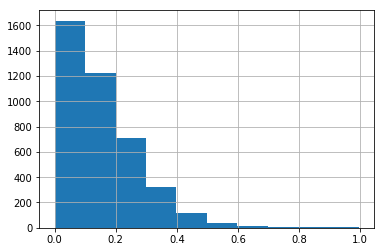

In [45]:
constant_rating_users_pred_df1['err'].hist()
plt.show()

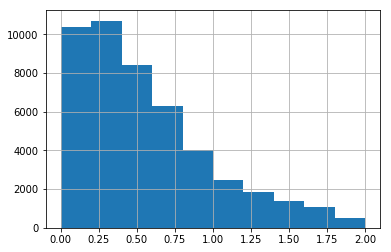

In [46]:
df1['err'].hist()
plt.show()

In [47]:
constant_rating_users_pred_df2.tail(10)

,uid,iid,r_ui,est,details,err,no_of_items_rated_by_user,no_of_users_rated_item
46890,-23925,1849,2.0,2.187133,"{'actual_k': 0, 'was_impossible': False}",0.187133,8,7
46891,-23925,1854,2.0,2.229847,"{'actual_k': 1, 'was_impossible': False}",0.229847,8,3
46892,-23925,1847,2.0,2.098834,"{'actual_k': 0, 'was_impossible': False}",0.098834,8,8
46893,-23925,1918,2.0,2.220331,"{'actual_k': 0, 'was_impossible': False}",0.220331,8,19
46894,-23925,1345,2.0,2.167445,"{'actual_k': 0, 'was_impossible': False}",0.167445,8,17
47005,-26126,8565,3.0,3.000000,"{'actual_k': 22, 'was_impossible': False}",0.000000,21,47
47006,-26126,8578,3.0,3.000000,"{'actual_k': 26, 'was_impossible': False}",0.000000,21,75
47007,-26126,14133,3.0,2.889670,"{'actual_k': 15, 'was_impossible': False}",0.110330,21,82
47008,-26126,8487,3.0,3.000000,"{'actual_k': 261, 'was_impossible': False}",0.000000,21,1014
47009,-26126,13990,3.0,2.872176,"{'actual_k': 71, 'was_impossible': False}",0.127824,21,503


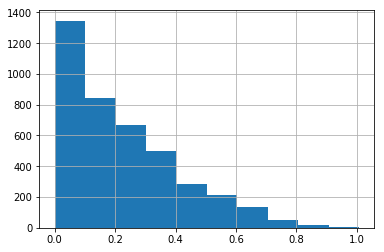

In [48]:
constant_rating_users_pred_df2['err'].hist()
plt.show()

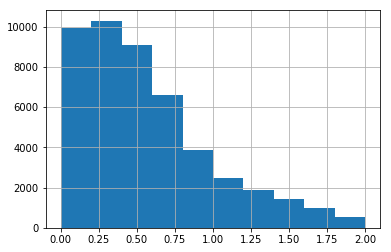

In [49]:
df2['err'].hist()
plt.show()

In [53]:
best_predictions1 = df1.sort_values(by='err')[:10]
worst_predictions1 = df1.sort_values(by='err')[-10:]

best_predictions2 = df2.sort_values(by='err')[:10]
worst_predictions2 = df2.sort_values(by='err')[-10:]

In [54]:
best_predictions1

,uid,iid,r_ui,est,details,err,no_of_items_rated_by_user,no_of_users_rated_item
20972,-82352,8911,3.0,3.0,{'was_impossible': False},0.0,22,47
27700,-73878,8431,3.0,3.0,{'was_impossible': False},0.0,17,47
10217,-103371,2,3.0,3.0,{'was_impossible': False},0.0,7,1668
1738,-127588,860,1.0,1.0,{'was_impossible': False},0.0,10,4
7373,-117873,602,3.0,3.0,{'was_impossible': False},0.0,76,188
17348,-94175,11829,3.0,3.0,{'was_impossible': False},0.0,5,106
43068,-11061,1853,3.0,3.0,{'was_impossible': False},0.0,27,8
11522,-106894,11829,3.0,3.0,{'was_impossible': False},0.0,19,108
45067,-23889,4560,3.0,3.0,{'was_impossible': False},0.0,59,66
11521,-106894,11657,3.0,3.0,{'was_impossible': False},0.0,19,43


In [55]:
worst_predictions1

,uid,iid,r_ui,est,details,err,no_of_items_rated_by_user,no_of_users_rated_item
33419,-33328,13231,1.0,3.0,{'was_impossible': False},2.0,14,35
12664,-109751,8482,1.0,3.0,{'was_impossible': False},2.0,18,421
26169,-68672,7923,1.0,3.0,{'was_impossible': False},2.0,5,33
1292,-129018,13990,1.0,3.0,{'was_impossible': False},2.0,6,480
1255,-128923,11009,1.0,3.0,{'was_impossible': False},2.0,49,409
2836,-135450,66,1.0,3.0,{'was_impossible': False},2.0,5,31
21233,-83116,11641,1.0,3.0,{'was_impossible': False},2.0,5,11
23808,-62987,8497,1.0,3.0,{'was_impossible': False},2.0,5,322
43921,-22494,7716,1.0,3.0,{'was_impossible': False},2.0,12,10
17241,-97739,7347,1.0,3.0,{'was_impossible': False},2.0,13,21


In [56]:
best_predictions2

,uid,iid,r_ui,est,details,err,no_of_items_rated_by_user,no_of_users_rated_item
38567,-27720,8477,3.0,3.0,"{'actual_k': 2, 'was_impossible': False}",0.0,26,8
15903,-93205,13479,3.0,3.0,"{'actual_k': 23, 'was_impossible': False}",0.0,17,60
23183,-84706,13313,3.0,3.0,"{'actual_k': 14, 'was_impossible': False}",0.0,49,44
23182,-84706,13613,3.0,3.0,"{'actual_k': 24, 'was_impossible': False}",0.0,49,109
42521,-10363,370,3.0,3.0,"{'actual_k': 123, 'was_impossible': False}",0.0,25,263
23172,-85696,11531,3.0,3.0,"{'actual_k': 1, 'was_impossible': False}",0.0,31,9
42522,-10363,110,3.0,3.0,"{'actual_k': 64, 'was_impossible': False}",0.0,25,132
4941,-113004,369,3.0,3.0,"{'actual_k': 258, 'was_impossible': False}",0.0,22,740
42523,-10363,289,3.0,3.0,"{'actual_k': 50, 'was_impossible': False}",0.0,25,95
7712,-118501,64,1.0,1.0,"{'actual_k': 32, 'was_impossible': False}",0.0,57,72


In [57]:
worst_predictions2

,uid,iid,r_ui,est,details,err,no_of_items_rated_by_user,no_of_users_rated_item
6225,-115805,9847,3.0,1.0,"{'actual_k': 1, 'was_impossible': False}",2.0,44,5
5563,-114688,11579,3.0,1.0,"{'actual_k': 12, 'was_impossible': False}",2.0,42,37
16659,-96575,14096,1.0,3.0,"{'actual_k': 17, 'was_impossible': False}",2.0,42,33
16658,-96575,13295,1.0,3.0,"{'actual_k': 52, 'was_impossible': False}",2.0,42,124
40489,-30132,7335,1.0,3.0,"{'actual_k': 3, 'was_impossible': False}",2.0,47,12
7307,-117759,3,3.0,1.0,"{'actual_k': 38, 'was_impossible': False}",2.0,169,67
40487,-30132,7330,1.0,3.0,"{'actual_k': 1, 'was_impossible': False}",2.0,47,13
40486,-30132,7324,1.0,3.0,"{'actual_k': 3, 'was_impossible': False}",2.0,47,21
17414,-98719,60,1.0,3.0,"{'actual_k': 33, 'was_impossible': False}",2.0,53,74
17964,-100005,49,1.0,3.0,"{'actual_k': 136, 'was_impossible': False}",2.0,16,610
